# Step 5 – Model Evaluation (Sales Data: Hit_Target Yes/No)

This notebook focuses **only on model evaluation** using:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix
- K-fold Cross-Validation

We assume preprocessing + model training were completed earlier.

## 1. Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

sns.set(style="whitegrid")


## 2. Load Sales Dataset
This dataset contains a Yes/No target column `Hit_Target`.

In [2]:
df = pd.read_csv("sales_data.csv")
df.head()


,Month,Region,Product_Category,Revenue,Units_Sold,Marketing_Spend,Monthly_Sales,Hit_Target
0,Jul,West,Furniture,80317.378049,661.365831,NaN,165696.948480,Yes
1,Apr,South,Sports,184870.737848,330.865728,54278.0,222307.522594,Yes
2,Nov,South,Sports,119079.303494,193.132039,22854.0,123990.730130,No
3,Aug,North,Furniture,220787.043421,79.673310,40501.0,239743.253181,Yes
4,May,North,Electronics,236890.319632,642.669754,17739.0,208968.114383,Yes


## 3. Define Features & Target
Here we simply define X and y again for evaluation.

In [3]:
X = df.drop(columns=["Hit_Target"])
y = df["Hit_Target"]

categorical_cols = ["Month", "Region", "Product_Category"]
numeric_cols = ["Revenue", "Units_Sold", "Marketing_Spend", "Monthly_Sales"]


## 4. Train/Test Split
We train a simple Random Forest for evaluation purposes.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## 5. Minimal Preprocessing + Model (Step 5 builds on earlier steps)

In [5]:
from sklearn.impute import SimpleImputer

preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("num", SimpleImputer(strategy="median"), numeric_cols)  # 🔥 FIX FOR NaN
])

model = Pipeline([
    ("prep", preprocess),
    ("rf", RandomForestClassifier(random_state=42))
])

model.fit(X_train, y_train)


,steps,"[('prep', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## 6. Predictions

In [6]:
y_pred = model.predict(X_test)

pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
}).head()


,Actual,Predicted
0,No,No
1,No,No
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes


## 7. Evaluation Metrics

In [7]:
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)


Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0


## 8. Bar Chart of Metrics

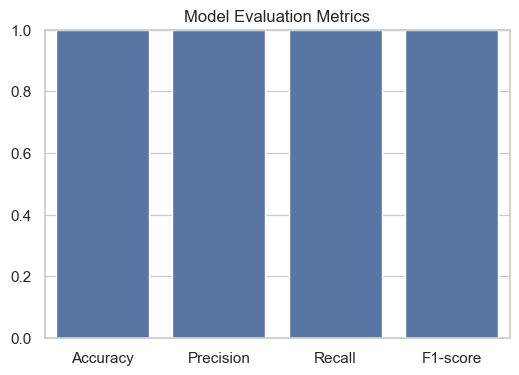

In [8]:
metrics = [accuracy, precision, recall, f1]
names = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(6,4))
sns.barplot(x=names, y=metrics)
plt.ylim(0,1)
plt.title("Model Evaluation Metrics")
plt.show()


## 9. Confusion Matrix

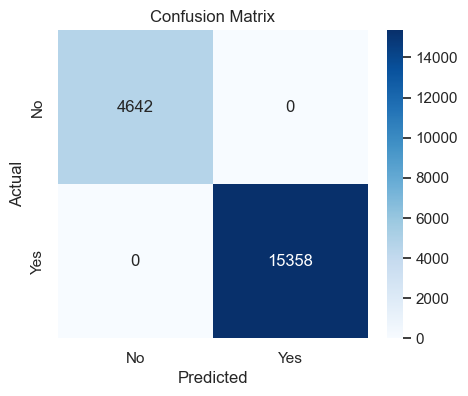

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 10. K-Fold Cross-Validation

In [10]:
cv_scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-validation scores: [1.      1.      1.      1.      0.99995]
Mean CV Accuracy: 0.99999
Standard Deviation: 1.9999999999997796e-05
